In [100]:
with open("the-verdict.txt","r",encoding="utf-8") as f:
    raw_data =f.read()
print(raw_data[:99])

I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


In [101]:
import re
text = "Hello, world. This, is a test."
result = re.split(r'(\s)', text)
print(result)

['Hello,', ' ', 'world.', ' ', 'This,', ' ', 'is', ' ', 'a', ' ', 'test.']


In [102]:
text = "Hello, world. Is this-- a test?"
result = re.split(r'([,.:;?_!"()\']|--|\s)', text)
result =  [item.strip() for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '.', 'Is', 'this', '--', 'a', 'test', '?']


In [103]:
preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', raw_data)
preprocessed = [item.strip() for item in preprocessed if item.strip()]
print(len(preprocessed))
print(preprocessed[:30])

4690
['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in']


In [104]:
all_words = sorted(set(preprocessed)
                   )
vocab = {token:integer for integer,token in enumerate(all_words)}
print(vocab)

{'!': 0, '"': 1, "'": 2, '(': 3, ')': 4, ',': 5, '--': 6, '.': 7, ':': 8, ';': 9, '?': 10, 'A': 11, 'Ah': 12, 'Among': 13, 'And': 14, 'Are': 15, 'Arrt': 16, 'As': 17, 'At': 18, 'Be': 19, 'Begin': 20, 'Burlington': 21, 'But': 22, 'By': 23, 'Carlo': 24, 'Chicago': 25, 'Claude': 26, 'Come': 27, 'Croft': 28, 'Destroyed': 29, 'Devonshire': 30, 'Don': 31, 'Dubarry': 32, 'Emperors': 33, 'Florence': 34, 'For': 35, 'Gallery': 36, 'Gideon': 37, 'Gisburn': 38, 'Gisburns': 39, 'Grafton': 40, 'Greek': 41, 'Grindle': 42, 'Grindles': 43, 'HAD': 44, 'Had': 45, 'Hang': 46, 'Has': 47, 'He': 48, 'Her': 49, 'Hermia': 50, 'His': 51, 'How': 52, 'I': 53, 'If': 54, 'In': 55, 'It': 56, 'Jack': 57, 'Jove': 58, 'Just': 59, 'Lord': 60, 'Made': 61, 'Miss': 62, 'Money': 63, 'Monte': 64, 'Moon-dancers': 65, 'Mr': 66, 'Mrs': 67, 'My': 68, 'Never': 69, 'No': 70, 'Now': 71, 'Nutley': 72, 'Of': 73, 'Oh': 74, 'On': 75, 'Once': 76, 'Only': 77, 'Or': 78, 'Perhaps': 79, 'Poor': 80, 'Professional': 81, 'Renaissance': 82, 'Ri

In [105]:
class SimpleTokenizerV1:
    def __init__(self,vocab):
        self.str_to_int = vocab
        self.int_to_str = {i:s for s,i in vocab.items()}
    def encode(self, text):
        preprocessed = re.split(r'([,.?_!"()\']|--|\s)',text)
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        print(preprocessed)
        idx = [self.str_to_int[s] for s in preprocessed]
        return idx
    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
        return text

In [106]:
tokenizer = SimpleTokenizerV1(vocab)
text = """"It's the last he painted, you know,"
 Mrs. Gisburn said with pardonable pride."""
ids = tokenizer.encode(text)
print(tokenizer.decode(ids))


['"', 'It', "'", 's', 'the', 'last', 'he', 'painted', ',', 'you', 'know', ',', '"', 'Mrs', '.', 'Gisburn', 'said', 'with', 'pardonable', 'pride', '.']
" It' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.


### Adding special context tokens (Thêm mã của ngữ cảnh đặc biệt)
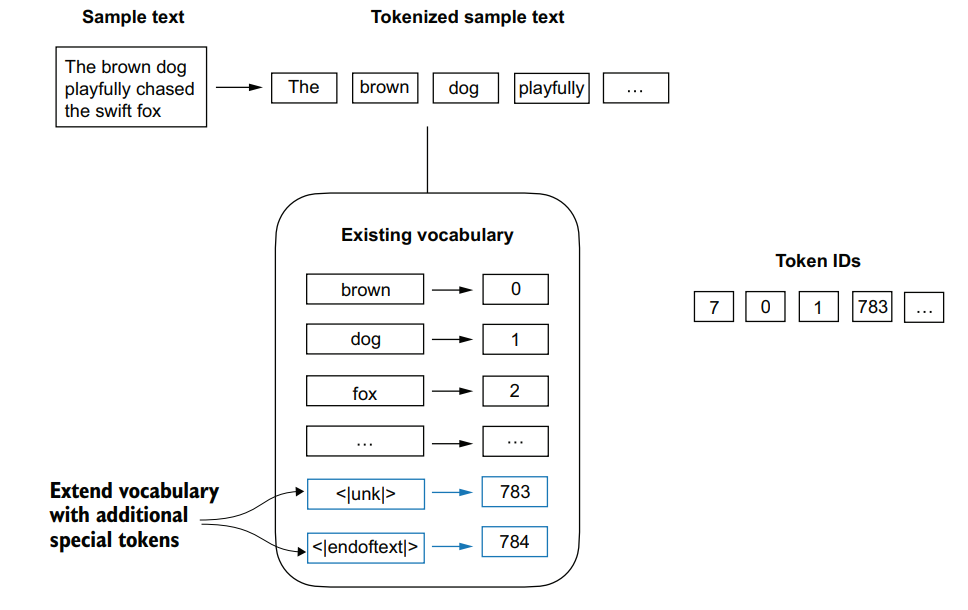


Instances, add <|unk|> token toi present unknown word, <|endoftext|>
token that we can use to separate two unrelated text sources. 

In [107]:
all_tokens = sorted(set(preprocessed))
all_tokens.extend(["<|endoftext|>", "<|unk|>"])
vocab = {token:interger for interger,token in enumerate(all_tokens)}
print(list(vocab.items())[-5:])
 

[('younger', 1127), ('your', 1128), ('yourself', 1129), ('<|endoftext|>', 1130), ('<|unk|>', 1131)]


In [108]:
class SimpleTokenizerV2:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = {i:s for s,i in vocab.items()}
    def encode(self,text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        preprocessed = [item if item in self.str_to_int else  "<|unk|>" for item in preprocessed ]
        ids = [self.str_to_int[s] for s in preprocessed]
        return ids
    def decode(self,idx):
        text = " ".join([self.int_to_str[i] for i in idx])
        text = re.sub(r'\s+([,.:;?!"()\'])', r'\1', text) 
        return text

text1 = "Hello, do you like tea?"
text2 = "In the sunlit terraces of the palace."
text = " <|endoftext|> ".join((text1, text2))


In [109]:
tokenizer = SimpleTokenizerV2(vocab)

In [110]:
!pip install tiktoken

TypeError: SimpleTokenizerV2.encode() got an unexpected keyword argument 'allowed_special'